## Data Exploration

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [7]:
np.random.seed(42)

In [8]:
df = pd.read_csv("datasets/historical_data.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [10]:
# convert the value of `created_at` and `actual_deliverty_time` to datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

#### Create a target variable(column) for regression
Here we will create a new column `actual_total_delivery_duration` by substracting the times between `actual_delivery_time` with `created_at`.
This new column `actual_total_delivery_duration` will be used as target variable for regression.
- `.dt.total_seconds()` &rarr; used to convert the newly created pandas datetime object to seconds.

In [11]:
df['actual_total_delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [12]:
df['estimated_non_prep_duration'] = df['estimated_store_to_consumer_driving_duration'] + df['estimated_order_place_duration']
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0


- Create a new column `busy_dashers_ratio` by dividing `total_busy_dashers` by `total_onshift_dashers`

In [13]:
df['busy_dashers_ratio'] = df['total_busy_dashers'] / df['total_onshift_dashers']
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000


## Data Preparation for modelling
Check the unique market id to determine how many states of data we are dealing with
- `nunique()` &rarr; returns number of unique values in a DataFrame.

In [14]:
df['market_id'].nunique()

6

In [15]:
# number of stores
df['store_id'].nunique()

6743

In [16]:
#number of ways order can be delivered
df['order_protocol'].nunique()

7

##### Create a dictionary with most repeated categories of each store to fill null rows where possible.
To find out the most repeated categories we have a column `store_primary_category` which gives the most served category in that store.
We first create a list `store_id_unique` which contains unique values from the column `store_id`.
Then we will create a dictionary with id of a particular store as the *key* of the dictionary.
Then, for the *value* we will create a seperate dataframe which contains only the details of a particular store and we will find the mode(most repeated value) of the column `store_primary_category` from that seperate dataframe which will give the most repeated food category of a particular store.

- `unique()` &rarr; extract only unique values from an iterator
- `tolist()` &rarr; convert the pandas array object to python list
- `df[df.store_id == store_id]` &rarr; Group out the details of a particular store into a dataframe which contains only rows of that store.
- `mode()` &rarr; Returns the most repeated value in an iterable.

In [17]:
store_id_unique = df['store_id'].unique().tolist()
store_id_and_category = {store_id: df[df.store_id == store_id].store_primary_category.mode() for store_id in store_id_unique}

We create a `fill()` function which takes the **store_id** as a parameter and returns the primary store category from the dictionary `store_id_and_category`.<br/>
Then we create a new column `nan_free_store_primary_category` and fill the most repeated the category as values in this column.

In [18]:
def fill(store_id):
	try:
		return store_id_and_category[store_id].values[0]
	except:
		np.nan

df['nan_free_store_primary_category'] = df.store_id.apply(fill)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio,nan_free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000,indian


**Creating Dummy Variable**<br/>
Let's create a dummy variable for the `order_protocol` column.<br/>
When working with data, it is common to encounter categorical variables that are non-numeric. These variables cannot be used directly in machine learnig models. So, one way to use them is by creating seperate column for each category and assigning **1** or **0** to indicate whether the category is present in each observation.

- `get_dummies()` &rarr; Creates a new dataframe with column of each unique category in original dataframe, and assigns 1 or 0 to indicate whether the category is present.
- `add_prefix()` &rarr; Adds `order_protocol_` as prefix to every column in a df. Doesn't affect the original df.

In [19]:
order_protocol_dummies = pd.get_dummies(df.order_protocol)
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')
order_protocol_dummies.head()

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [20]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio,nan_free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000,indian


In [21]:
# market id dummies 
market_id_dummy = pd.get_dummies(df.market_id)
market_id_dummy = market_id_dummy.add_prefix('market_id_')
market_id_dummy.head()

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [22]:
# store primary category dummies
store_primary_category_dummies = pd.get_dummies(df.nan_free_store_primary_category)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head()

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio,nan_free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000,indian


In [24]:
# create a training dataframe by dropping unnessary columns
train_df = df.drop(columns= ['created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 'nan_free_store_primary_category', 'order_protocol'])
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000


**Concat all dataframes**
- `concat()` &rarr; Concatinate two dataframes along a particular axis (**0**: row, **1**: column).
- `astype()` &rarr; Cast a pandas object to specific datatype. `float32` uses 32 bits of precision which uses less memory than normal float64.
- In `float32` &rarr; **1** bit is used for sign, **8** for exponent of numbers in base 2 and **23** for mantissa.

In [25]:
# concat all dataframes to create final training dataframe
train_df = pd.concat([train_df, order_protocol_dummies, market_id_dummy, store_primary_category_dummies], axis=1)
train_df = train_df.astype('float32')
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The `describe()` method provides *statistical* summary of a dataframe. It returns a new dataframe that includes the following statistics.
- `count` &rarr; Number of not null values in the column.
- `mean` &rarr; Arithmatic mean of the values in the column.
- `std` &rarr; Standard Deviation
- `min` &rarr; Minimum value in the column
- `25%` &rarr; The value at the 25th percentile of the column
- `50%` &rarr; The value at the 50th percentile of the column
- `75%` &rarr; The value at the 75th percentile of the column
- `max` &rarr; The maximum value in the column.

In [26]:
train_df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,3.196391,2682.331543,2.670791,686.218506,1159.588623,44.808094,41.739746,58.050064,308.560181,545.358948,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,2.666546,1823.093750,1.630255,522.038635,558.411377,34.526787,32.145733,52.661831,90.139648,219.352905,...,0.028545,0.013689,0.073725,0.105701,0.027184,0.189384,0.034260,0.037834,0.064935,0.173122
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
train_df['busy_dashers_ratio'].describe()

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ratio, dtype: float64

#### Check for Infinite or NaN values
Check if the `train_df` contains any infinite or NaN values to delete from the dataframe.

- **np.any()** <br/>
`np.any(array, axis)` function returns True if any element of an array evulates to True and False otherwise. Takes **array** and **axis** as arguments. Where, `axis=0` evulates along the rows and `axis=1` evulates along the columns.

- **np.where()** <br/>
`np.where(condition, x, y)` function takes a condition and applies it to the dataframe. Applies **x** if the condition is **True** and **y** if condition is **False**. If the replacement values is not specified then it returns a numpy array of ***indices*** which returns **True** for the **condition**.

- `np.isfinite()` &rarr; Returns a boolean dataframe that is same shape as `train_df`. **True** if the vlaue is finite and **False** if the value is infinite or NaN.
- `~` &rarr; Inverses the boolean dataframe to show **True** for the infinite or NaN values.
- `np.any` &rarr; Returns **True** if any column in `train_df` contains NaN or infinite; 
- `np.where()` &rarr; Returns the ***indices*** of elements in an array that satisfy a certain condition.




In [28]:
# finding the column indices of 'train_df' that contain any non-finite(NaN or infinite) values
np.where(np.any(~np.isfinite(train_df),axis=0) == True)
train_df.shape

(197428, 100)

- `dropna()` &rarr; Drops rows which contains at least one NaN value. If column needs to be dropped then specify `axis=1`.
- `replace(what, with)` &rarr; replaces negative and positive infinite values with NaN values.

In [29]:
# replace infinite values with NaN to drop all NaN values
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
#drop all NaN values
train_df.dropna(inplace=True)
train_df.shape

(177070, 100)

#### Remove Collinearity and Redundancy
- `corr()` &rarr; returns **collinear matrix** of the DataFrame.
- `triu()` &rarr; A.k.a "*triangle-upper*"—used to extract the upper triangular part of 2D array while setting all elements below the main diagonal to 0.
- `ones_like(array)` &rarr; returns an array with same shape as input array filled with 1's instead of original array.
- `diverging_palette()` &rarr;  used to create a custom colormap with a smooth transition from one color to another.

<Axes: >

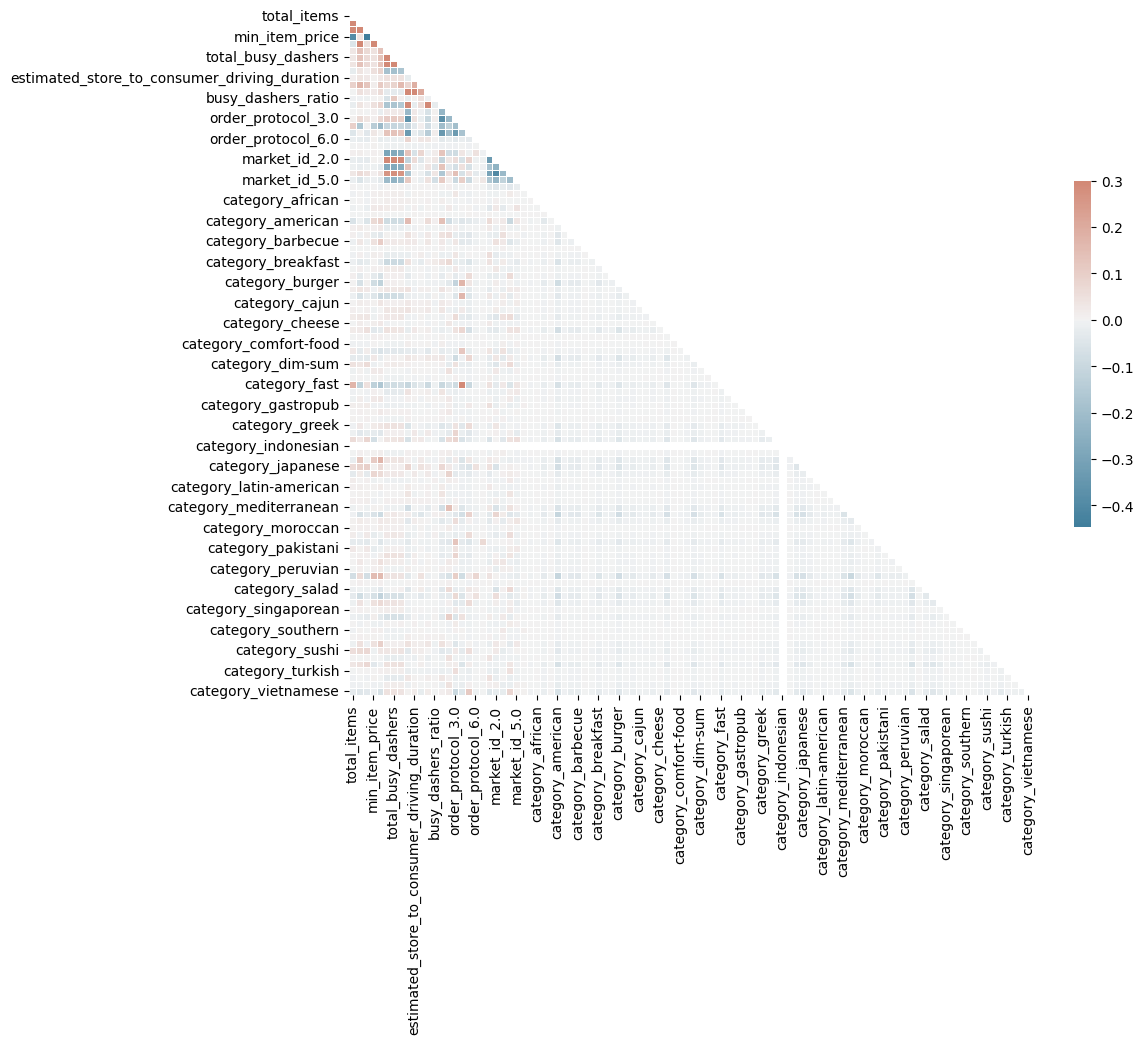

In [30]:
corr = train_df.corr()


mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5} )

In [31]:
train_df['category_indonesian'].describe()

count    177070.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: category_indonesian, dtype: float64

In [32]:
def get_redundant_pairs(df):
	"""Get diagnonal and lower triangular pairs of correlation matrix"""
	pairs_to_drop = set()
	cols = df.columns
	for i in range(0, df.shape[1]): #shape is contained in a tuple (rows, cols) so 0=rows and 1=cols
		for j in range(0, i+1): # i+1 to include all the redundant pairs from the lower triangular part
			pairs_to_drop.add((cols[i], cols[j]))
	return pairs_to_drop

#### Drop the redundant pairs and return the absolute correlation in descending order.

- `unstack()` &rarr; reshape data—pivot a label of the index labels to become new column labels.

In [33]:
# au_corr = corr.abs().unstack()
# pd.DataFrame(au_corr)

def get_top_abs_correlations(df, n=5):
	au_corr = df.corr().abs().unstack()
	labels_to_drop = get_redundant_pairs(df)
	au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
	return au_corr[0:n]

In [34]:
print("Top Absolute Correlations")
pd.DataFrame(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations


0
total_onshift_dashers                        total_busy_dashers           0.941741
                                             total_outstanding_orders     0.934639
total_busy_dashers                           total_outstanding_orders     0.931295
estimated_store_to_consumer_driving_duration estimated_non_prep_duration  0.923086
estimated_order_place_duration               order_protocol_1.0           0.897645
total_items                                  num_distinct_items           0.758146
subtotal                                     num_distinct_items           0.682890
total_items                                  subtotal                     0.557175
min_item_price                               max_item_price               0.541241
subtotal                                     max_item_price               0.507947
order_protocol_4.0                           category_fast                0.489946
num_distinct_items                           min_item_price               0.446733
market_id_2.0                                market_id_4.0                0.402421
total_items                                  min_item_price               0.389277
order_protocol_1.0                           order_protocol_3.0           0.373581
estimated_order_place_duration               order_protocol_3.0           0.364170
                                             estimated_non_prep_duration  0.363297
order_protocol_1.0                           order_protocol_5.0           0.342345
market_id_1.0                                market_id_2.0                0.334580
estimated_order_place_duration               order_protocol_5.0           0.333291

In [35]:
train_df = df.drop(columns=['created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 'nan_free_store_primary_category', 'order_protocol'])

In [36]:
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000


##### Concat the training dataset with dummy variables

In [37]:
#don't concat market_id dummies
train_df = pd.concat([train_df, order_protocol_dummies, store_primary_category_dummies], axis=1)
train_df

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,...,0,0,0,0,0,0,0,0,0,0
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,...,0,0,0,0,0,0,0,0,0,0
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,...,0,0,0,0,0,0,0,0,0,0
197424,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,...,0,0,0,0,0,0,0,0,0,0
197425,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,...,0,0,0,0,0,0,0,0,0,0
197426,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#drop highly correlated features
train_df = train_df.drop(columns=['total_onshift_dashers', 'total_busy_dashers', 'category_indonesian', 'estimated_non_prep_duration'])

##### Convert numeric columns to float32
Select all the numeric columns, from the set of numeric columns remove any *timedelta* datatype and `actual_total_delivery_duration` column and convert all remaining columns to float32.
- `select_dtype()` &rarr; returns the included datatype columns form the dataframe.
- `set1.difference(set2)` &rarr; returns the difference between set1 and set2. $A-B$
- `total_seconds()` &rarr; convert timedelta to actual number of seconds.

In [39]:
num_cols = train_df.select_dtypes(include=['number', 'bool']).columns
timedelta_cols = train_df.select_dtypes(include=['timedelta']).columns
cols_to_convert = num_cols.difference(timedelta_cols).difference(['actual_total_delivery_duration'])
train_df[cols_to_convert] = train_df[cols_to_convert].astype('float32')

In [40]:
#convert actual_total_delivery_duration to float32
train_df['actual_total_delivery_duration'] = train_df['actual_total_delivery_duration'].astype('float32')

#replace infinite values with nan to drop all nans
train_df.replace([-np.inf, np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)

In [41]:
print("Top Absolute Correlations")
pd.DataFrame(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations


,,0
estimated_order_place_duration,order_protocol_1.0,0.897645
total_items,num_distinct_items,0.758146
subtotal,num_distinct_items,0.682890
total_items,subtotal,0.557175
min_item_price,max_item_price,0.541241
subtotal,max_item_price,0.507947
order_protocol_4.0,category_fast,0.489946
num_distinct_items,min_item_price,0.446733
total_items,min_item_price,0.389277
order_protocol_1.0,order_protocol_3.0,0.373581


In [42]:
# drop created_at, market_id, store_id, store_primary_category, actual_delivery_time, order_protocol
train_df = df.drop(columns=["created_at", "market_id", "store_id", "store_primary_category",
							"actual_delivery_time", "nan_free_store_primary_category","order_protocol"])

# don't concat order_protocol dummies
train_df = pd.concat([train_df,store_primary_category_dummies], axis=1)

#drop highly correlated features
train_df = train_df.drop(columns=['total_onshift_dashers', 'total_busy_dashers', 'category_indonesian', 'estimated_non_prep_duration'])

# Align dtype over dataset
num_cols = train_df.select_dtypes(include=["number", "bool"]).columns
timedelta_cols = train_df.select_dtypes(include=["timedelta"]).columns
cols_to_convert = num_cols.difference(timedelta_cols).difference(["actual_total_delivery_duration"])
train_df[cols_to_convert] = train_df[cols_to_convert].astype("float32")

# Convert actua_total_delivery_duration to float32
train_df["actual_total_delivery_duration"] = train_df["actual_total_delivery_duration"].astype("float32")

# Replace inf values with NaN to drop all NaNs
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)

print("Top Absolute Correlations")
pd.DataFrame(get_top_abs_correlations(train_df, 20))


Top Absolute Correlations


,,0
total_items,num_distinct_items,0.758146
subtotal,num_distinct_items,0.682890
total_items,subtotal,0.557175
min_item_price,max_item_price,0.541241
subtotal,max_item_price,0.507947
num_distinct_items,min_item_price,0.446733
total_items,min_item_price,0.389277
estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,0.188418
subtotal,actual_total_delivery_duration,0.172312
total_outstanding_orders,estimated_order_place_duration,0.171049


##### Feature Engineering
Since, `total_items` and `num_distinct_items` are highly correlated with each other along with `subtotal` and `num_distinct_items`. We use feature engineering to remove these columns. A new column `percent_distinct_item_of_total` is created by dividing `num_distinct_items` with `total_items`. Then these highly correlated features can be dropped from the training dataset.

In [43]:
train_df['percent_distinct_item_of_total'] = train_df['num_distinct_items'] / train_df['total_items']
train_df['avg_price_per_item'] = train_df['subtotal'] / train_df['total_items']
train_df.drop(columns=['num_distinct_items', 'subtotal'], inplace=True)

print("Top Absolute Correlations")
pd.DataFrame(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations


0
min_item_price                               avg_price_per_item              0.860580
max_item_price                               avg_price_per_item              0.770382
min_item_price                               max_item_price                  0.541241
total_items                                  percent_distinct_item_of_total  0.445751
                                             min_item_price                  0.389277
                                             avg_price_per_item              0.310759
percent_distinct_item_of_total               avg_price_per_item              0.226711
category_pizza                               avg_price_per_item              0.225510
estimated_store_to_consumer_driving_duration actual_total_delivery_duration  0.188418
max_item_price                               percent_distinct_item_of_total  0.178021
category_fast                                avg_price_per_item              0.175950
min_item_price                               percent_distinct_item_of_total  0.173524
total_outstanding_orders                     estimated_order_place_duration  0.171049
total_items                                  category_fast                   0.170988
max_item_price                               category_italian                0.169775
                                             category_fast                   0.166169
category_italian                             avg_price_per_item              0.158193
total_outstanding_orders                     actual_total_delivery_duration  0.157604
max_item_price                               category_pizza                  0.157577
category_fast                                percent_distinct_item_of_total  0.153614

In [44]:
# engineering 'price_range_of_items' and dropping 'max_item_price' and 'min_item_price'
train_df['price_range_of_items'] = train_df['max_item_price'] - train_df['min_item_price']
train_df.drop(columns=['max_item_price', 'min_item_price'], inplace=True)

print("Top Absolute Correlations")
pd.DataFrame(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations


0
total_items                                  percent_distinct_item_of_total  0.445751
                                             price_range_of_items            0.333304
                                             avg_price_per_item              0.310759
percent_distinct_item_of_total               avg_price_per_item              0.226711
category_pizza                               avg_price_per_item              0.225510
estimated_store_to_consumer_driving_duration actual_total_delivery_duration  0.188418
category_fast                                avg_price_per_item              0.175950
total_outstanding_orders                     estimated_order_place_duration  0.171049
total_items                                  category_fast                   0.170988
category_italian                             avg_price_per_item              0.158193
total_outstanding_orders                     actual_total_delivery_duration  0.157604
category_fast                                percent_distinct_item_of_total  0.153614
estimated_order_place_duration               category_american               0.150174
category_american                            category_pizza                  0.106998
estimated_order_place_duration               category_fast                   0.106739
category_american                            category_mexican                0.106459
actual_total_delivery_duration               price_range_of_items            0.104689
category_burger                              avg_price_per_item              0.104437
total_outstanding_orders                     price_range_of_items            0.100228
category_mexican                             category_pizza                  0.097818

### Removing Multicollinearity
**Variance Inflation Factor(VIF)** is used to measure the correlation between two features.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
def compute_vif(features):
	vif_data = pd.DataFrame()
	vif_data['feature'] = features
	vif_data['VIF'] = [variance_inflation_factor(train_df[features].values, i) for i in range(len(features))]
	return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [ ]:
# # Apply VIF computation to all columns
# features = train_df.drop(columns=["actual_total_delivery_duration"]).columns.to_list()
# vif_data = compute_vif(features)
# vif_data

#### Variance Inflation Factor(VIF)
Compute VIF until all the features with high multicollinearity—columns with more than 20 vif score—are removed.
```
multicollinearity = True

while multicollinearity:
	highest_vif_feature = vif_data['feature'].values.to_list()[-1]
	print("Will remove", highest_vif_feature)
	features.remove(highest_vif_feature)
	vif_data = compute_vif(features)
	multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data
```

In [ ]:
# # remove feature name with more than 20 vif score
# selected_features = vif_data['feature'].to_list()
# selected_features.remove('percent_distinct_item_of_total')
# len(selected_features)

In [ ]:
selected_features = train_df.drop(columns=["actual_total_delivery_duration"]).columns.to_list()
selected_features.remove('percent_distinct_item_of_total')
len(selected_features)

80

## Feature Selection
### Random Forest regression.

In [ ]:
import cudf
from sklearn.model_selection import train_test_split
from cuml.ensemble import RandomForestRegressor
from cuml import train_test_split

- `train_test_split(X, y)` &rarr; used to split the dataset into training and testing data.
- `test_size=0.2` &rarr; 20% of data will be testing data and 80% will be training data
- `random_state=42` &rarr; used to specify random seed—each time the code is run, it will give the same train and test split data

In [ ]:
X = train_df[selected_features] # training features
y = train_df['actual_total_delivery_duration'] # training target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cuX_train = cudf.DataFrame(X_train)
cuy_train = cudf.DataFrame(y_train)

In [ ]:
# training the random forest regressor model
feature_names = [f'feature {i}' for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

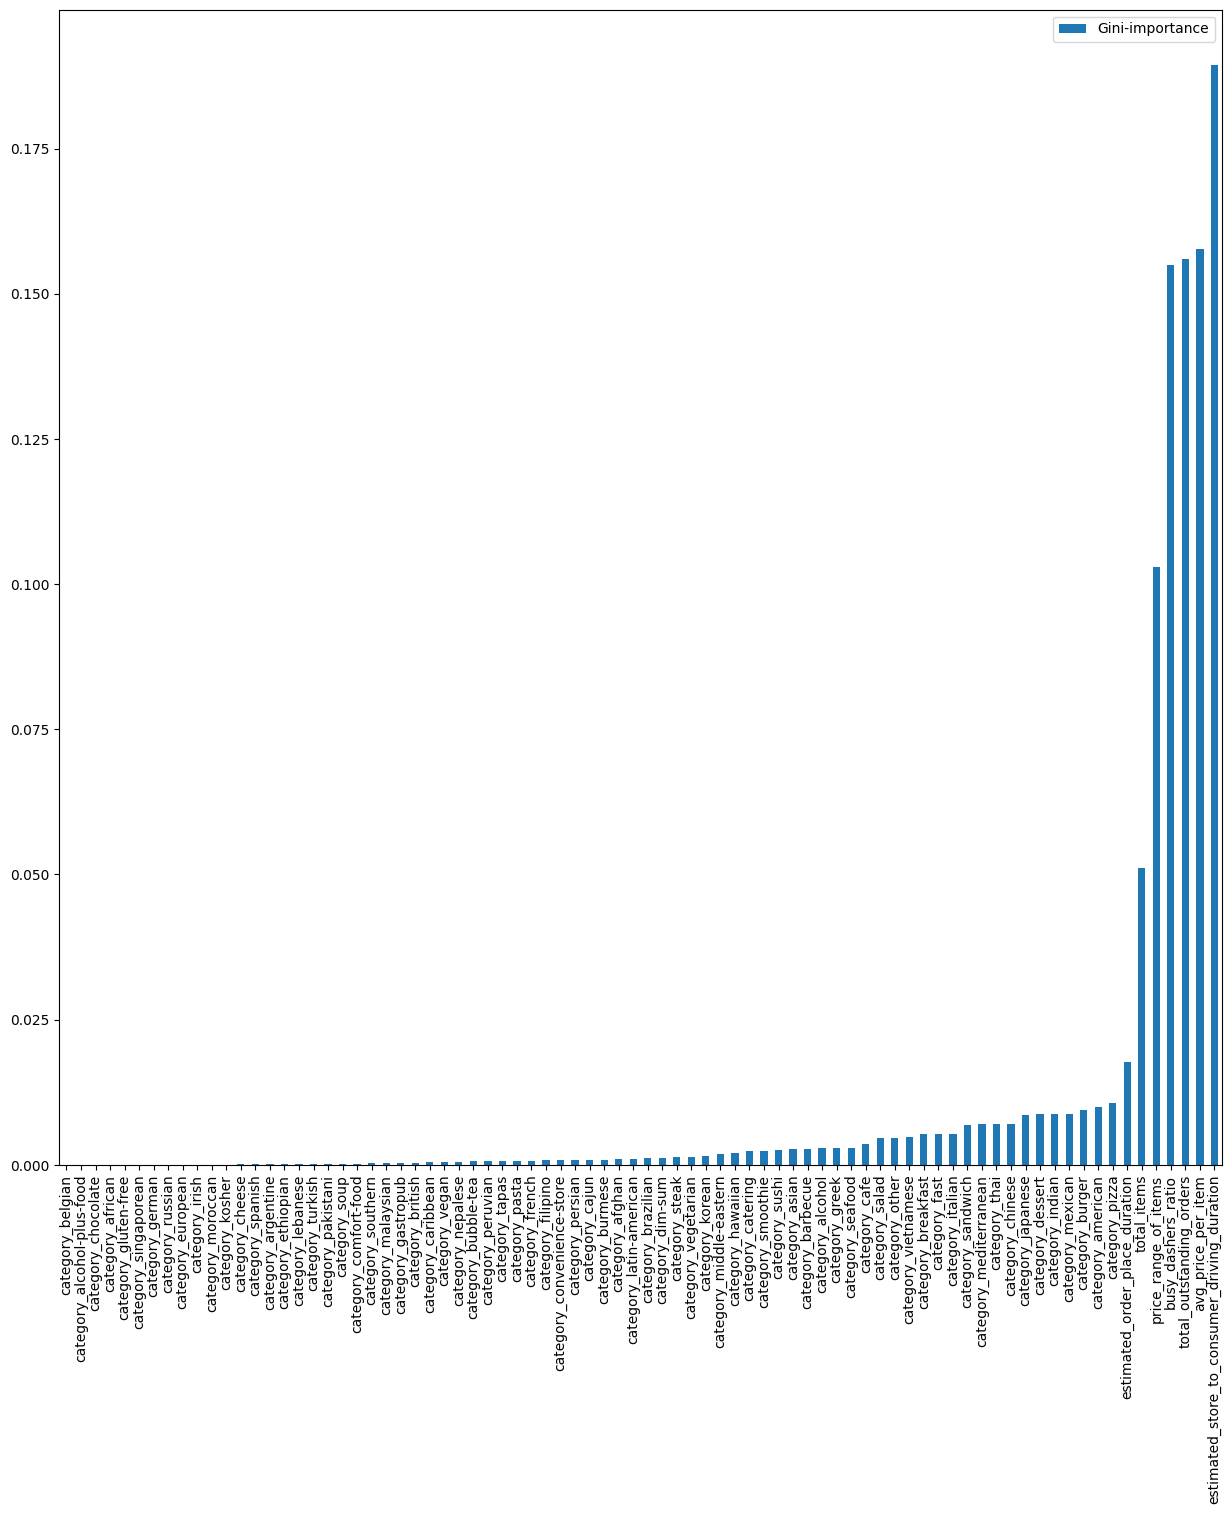

In [ ]:
#dictionry to hold feature names: feature importance
feats = {}
for features, importance in zip(X.columns, forest.feature_importances_):
	feats[features] = importance

# DataFrame holding gini score of each feature
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

# plot bar graph of each feature corresponding to its Gini score
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15, 15))

plt.show()

- `tolist()` &rarr; used to convert numpy array to pyton list

In [ ]:
# top 35 important features according to Gini index
importances.sort_values(by="Gini-importance")[-35:].index.tolist()

['category_middle-eastern',
 'category_hawaiian',
 'category_catering',
 'category_smoothie',
 'category_sushi',
 'category_asian',
 'category_barbecue',
 'category_alcohol',
 'category_greek',
 'category_seafood',
 'category_cafe',
 'category_salad',
 'category_other',
 'category_vietnamese',
 'category_breakfast',
 'category_fast',
 'category_italian',
 'category_sandwich',
 'category_mediterranean',
 'category_thai',
 'category_chinese',
 'category_japanese',
 'category_dessert',
 'category_indian',
 'category_mexican',
 'category_burger',
 'category_american',
 'category_pizza',
 'estimated_order_place_duration',
 'total_items',
 'price_range_of_items',
 'busy_dashers_ratio',
 'total_outstanding_orders',
 'avg_price_per_item',
 'estimated_store_to_consumer_driving_duration']

### Principal Component Analysis(PCA)
PCA is a dimensionality reduction technique.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # z score normalization

/tmp/ipykernel_6633/2857195420.py:10: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 81, 1)


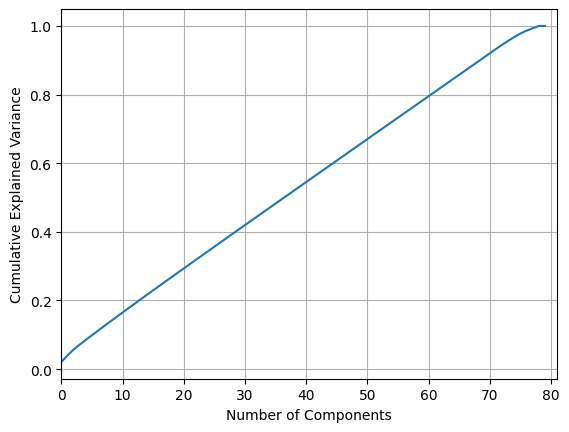

In [ ]:
# explaining out data with PCA
X_Train = X_train

# Finding the normalized array of X_train(mean centered data)
X_std = StandardScaler().fit_transform(X_Train)

# fit the pca model in the standarized data 'X_std'
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 81, 1)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

$MinMaxScaler = \frac{X-X_{min}}{X_{max}-X_{min}}$
- $X$ is the feature value
- $X_{min}$ is the minimum feature value
- $X_{max}$ is the maximum feature value

In [ ]:
# min max scaler is used to scale the features between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#apply the scaler to features and target variable
def scale(scaler, X, y):
    X_scaler = scaler
	
	# Fit the scaler to the data and compute the minimum and maximum values
    X_scaler.fit(X=X, y=y)

	# Scale the data using the calculated minimum and maximum values
    X_scaled = X_scaler.transform(X)
    y_scaler = scaler
    y_scaler.fit(y.values.reshape(-1, 1))
    y_scaled = y_scaler.transform(y.values.reshape(-1, 1))
    
    return X_scaled, y_scaled, X_scaler, y_scaler

In [ ]:
# scale our original features and target variable
X_scaled, y_scaled, X_scaler, y_scaler = scale(MinMaxScaler(), X, y)

# split the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

# convert the scaled error back to the actual error (Root Mean Squared Error) 
# by performing the inverse scaling on the predicted target variable
def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):
    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    # return RMSE with squared False
    rmse_error = mean_squared_error(y_test, y_predict[:,0], squared=False)
    print(f"Error = {rmse_error} in " + model_name)
    
    return rmse_error, y_predict

### ML Model

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree, svm, neighbors, linear_model

In [ ]:
# generic function which can work with multiple ML models
def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    model.fit(X_train, y_train)
    y_predict=model.predict(X_train)
    train_error = mean_squared_error(y_train, y_predict, squared=False)
    y_predict=model.predict(X_test)
    test_error = mean_squared_error(y_test, y_predict, squared=False)
    if verbose:
        print("Train error = "'{}'.format(train_error)+" in "+ model_name)
        print("Test error = "'{}'.format(test_error)+" in "+ model_name)
    trained_model = model
    
    return trained_model, y_predict, train_error, test_error

In [ ]:
# Create 4 dictionaries containing different parameters to find the best performance model
pred_dict = {
    "regression_model": [],
    "feature_set": [],
    "scaler_name": [],
    "RMSE": [],
}

regression_models = {
    "Ridge": linear_model.Ridge(),
    "DecisionTree": tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "MLP": MLPRegressor(),
}

feature_sets = {
    "full dataset": X.columns.to_list(),
    "selected_features_40": importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
    "selected_features_20": importances.sort_values(by='Gini-importance')[-20:].index.tolist(),
    "selected_features_10": importances.sort_values(by='Gini-importance')[-10:].index.tolist(),
}

scalers = {
    "Standard scaler": StandardScaler(),
    "MinMax scaler": MinMaxScaler(),
    "NotScale": None,
}


In [ ]:
# examine the error for each combination
for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print("")
        print(f"-----scaled with {scaler_name}--------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():
            if scaler_name == "NotScale":
                X = train_df[feature_set]
                y = train_df["actual_total_delivery_duration"]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=True)
                
            else:
                X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X[feature_set], y)
                X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
                _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name)
                rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)


-----scaled with Standard scaler--------- included columns are full dataset

Train error = 0.7679958343505859 in Ridge
Test error = 1.4718950986862183 in Ridge
Error = 2053.649658203125 in Ridge
Train error = 0.7651458940862195 in DecisionTree
Test error = 1.4749561734391925 in DecisionTree
Error = 2057.920478651238 in DecisionTree
Train error = 0.2833459051742816 in RandomForest
Test error = 1.4685284435966148 in RandomForest
Error = 2048.952241092309 in RandomForest
Train error = 0.6910554766654968 in XGBoost
Test error = 1.4594964981079102 in XGBoost
Error = 2036.350341796875 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 70
[LightGBM] [Info] Start training from score -

c:\Users\saile\miniconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.45476e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1071.5411376953125 in Ridge
Test error = 2053.646728515625 in Ridge
Train error = 1067.563533652681 in DecisionTree
Test error = 2057.9204783875157 in DecisionTree
Train error = 399.51132339522223 in RandomForest
Test error = 2047.2710209173426 in RandomForest
Train error = 967.53271484375 in XGBoost
Test error = 2036.90771484375 in XGBoost
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1472
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 70
[LightGBM] [Info] Start training from score 2851.342096
Train error = 1017.3507509038428 in LGBM
Test error = 2034.6144111553128 in LGBM


c:\Users\saile\miniconda3\envs\DataScience\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 1054.083984375 in MLP
Test error = 2047.4248046875 in MLP

-----scaled with Standard scaler--------- included columns are selected_features_40

Train error = 0.7687368988990784 in Ridge
Test error = 1.4722107648849487 in Ridge
Error = 2054.08984375 in Ridge
Train error = 0.7651487863430294 in DecisionTree
Test error = 1.4744414015488891 in DecisionTree
Error = 2057.202247387055 in DecisionTree
Train error = 0.2865619516546941 in RandomForest
Test error = 1.468938532161801 in RandomForest
Error = 2049.5244137764535 in RandomForest
Train error = 0.694304347038269 in XGBoost
Test error = 1.4595633745193481 in XGBoost
Error = 2036.44384765625 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1447
[LightGBM] [Info] Number of data points in the train set: 141656,

c:\Users\saile\miniconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.2862e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1067.56756901263 in DecisionTree
Test error = 2057.202247177345 in DecisionTree
Train error = 397.33266563415026 in RandomForest
Test error = 2049.4541929581546 in RandomForest
Train error = 963.9171752929688 in XGBoost
Test error = 2034.8837890625 in XGBoost
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1412
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 40
[LightGBM] [Info] Start training from score 2851.342096
Train error = 1016.9647002961747 in LGBM
Test error = 2034.6442843421676 in LGBM


c:\Users\saile\miniconda3\envs\DataScience\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 1054.4246826171875 in MLP
Test error = 2047.805419921875 in MLP

-----scaled with Standard scaler--------- included columns are selected_features_20

Train error = 0.7700236439704895 in Ridge
Test error = 1.4730443954467773 in Ridge
Error = 2055.253173828125 in Ridge
Train error = 0.7661162188990934 in DecisionTree
Test error = 1.4730665410427284 in DecisionTree
Error = 2055.2839845053227 in DecisionTree
Train error = 0.2851396794822493 in RandomForest
Test error = 1.4686480969654667 in RandomForest
Error = 2049.119186433741 in RandomForest
Train error = 0.6913766860961914 in XGBoost
Test error = 1.460400104522705 in XGBoost
Error = 2037.6112060546875 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train

c:\Users\saile\miniconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.51443e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1068.9173711925073 in DecisionTree
Test error = 2055.2839845040717 in DecisionTree
Train error = 394.8084909237715 in RandomForest
Test error = 2050.091534276809 in RandomForest
Train error = 972.0704345703125 in XGBoost
Test error = 2035.9483642578125 in XGBoost
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 20
[LightGBM] [Info] Start training from score 2851.342096
Train error = 1018.612798689076 in LGBM
Test error = 2034.4421138809541 in LGBM


c:\Users\saile\miniconda3\envs\DataScience\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 1059.4361572265625 in MLP
Test error = 2048.985107421875 in MLP

-----scaled with Standard scaler--------- included columns are selected_features_10

Train error = 0.7716490030288696 in Ridge
Test error = 1.4739305973052979 in Ridge
Error = 2056.4892578125 in Ridge
Train error = 0.7663546505857532 in DecisionTree
Test error = 1.4725688703976707 in DecisionTree
Error = 2054.5896136214596 in DecisionTree
Train error = 0.2890314936723066 in RandomForest
Test error = 1.4697797201269103 in RandomForest
Error = 2050.698074400427 in RandomForest
Train error = 0.7021036148071289 in XGBoost
Test error = 1.4613797664642334 in XGBoost
Error = 2038.9781494140625 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1357
[LightGBM] [Info] Number of data points in the train 

In [ ]:
pred_df = pd.DataFrame(pred_dict)
pred_df

,regression_model,feature_set,scaler_name,RMSE
0,Ridge,full dataset,Standard scaler,2053.649658
1,DecisionTree,full dataset,Standard scaler,2057.920479
2,RandomForest,full dataset,Standard scaler,2048.952241
3,XGBoost,full dataset,Standard scaler,2036.350342
4,LGBM,full dataset,Standard scaler,2033.121764
...,...,...,...,...
67,DecisionTree,selected_features_10,NotScale,2084.106689
68,RandomForest,selected_features_10,NotScale,2084.106689
69,XGBoost,selected_features_10,NotScale,2084.106689
70,LGBM,selected_features_10,NotScale,2084.106689
